## Kmean Clustering Algorithm

#### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
from google.colab import files
uploade = files.upload()

Saving ^JKSE.csv to ^JKSE.csv


In [10]:
df = pd.read_csv('^JKSE.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,20160104,4580.165039,4603.824219,4525.918945,4525.918945,4525.918945,21276600.0
1,20160105,4527.431152,4594.340820,4527.003906,4557.821777,4557.821777,24364900.0
2,20160106,4563.653809,4639.236816,4562.573242,4608.981934,4608.981934,29976300.0
3,20160107,4573.692871,4577.636230,4530.448242,4530.448242,4530.448242,24018600.0
4,20160108,4524.862793,4550.907227,4507.414063,4546.288086,4546.288086,23991300.0


In [11]:
df=df.iloc[:,1:6]
df

,Open,High,Low,Close,Adj Close
0,4580.165039,4603.824219,4525.918945,4525.918945,4525.918945
1,4527.431152,4594.340820,4527.003906,4557.821777,4557.821777
2,4563.653809,4639.236816,4562.573242,4608.981934,4608.981934
3,4573.692871,4577.636230,4530.448242,4530.448242,4530.448242
4,4524.862793,4550.907227,4507.414063,4546.288086,4546.288086
...,...,...,...,...,...
1480,6716.157227,6732.897949,6662.538086,6677.875977,6677.875977
1481,6697.423828,6698.414063,6668.054199,6683.276855,6683.276855
1482,6694.957031,6751.001953,6694.796875,6699.346191,6699.346191
1483,6688.568848,6691.711914,6544.895996,6561.553223,6561.553223


In [12]:
df.shape

(1485, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1436 non-null   float64
 1   High       1436 non-null   float64
 2   Low        1436 non-null   float64
 3   Close      1436 non-null   float64
 4   Adj Close  1436 non-null   float64
dtypes: float64(5)
memory usage: 58.1 KB


In [14]:
df.isnull().sum()

Open         49
High         49
Low          49
Close        49
Adj Close    49
dtype: int64

In [15]:
df= df.dropna()
df

,Open,High,Low,Close,Adj Close
0,4580.165039,4603.824219,4525.918945,4525.918945,4525.918945
1,4527.431152,4594.340820,4527.003906,4557.821777,4557.821777
2,4563.653809,4639.236816,4562.573242,4608.981934,4608.981934
3,4573.692871,4577.636230,4530.448242,4530.448242,4530.448242
4,4524.862793,4550.907227,4507.414063,4546.288086,4546.288086
...,...,...,...,...,...
1480,6716.157227,6732.897949,6662.538086,6677.875977,6677.875977
1481,6697.423828,6698.414063,6668.054199,6683.276855,6683.276855
1482,6694.957031,6751.001953,6694.796875,6699.346191,6699.346191
1483,6688.568848,6691.711914,6544.895996,6561.553223,6561.553223


In [16]:
from sklearn.preprocessing import StandardScaler
features = df.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)

In [17]:
X_scaled.shape

(1436, 5)

Determining optimal number of components for PCA looking at the explained variance as a function of the components

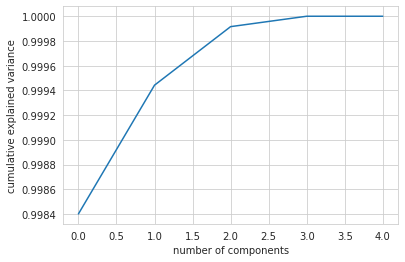

In [18]:
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here we see that we'd need about 100 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations

#### Apply PCA to reduce the number of dimensions from 502 to 2 dimensions for better data visualization.

In [19]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X_scaled)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X_scaled.shape)
print('--------------------------------------------------------------------')
print('Restransformed Feature shape :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('--------------------------------------------------------------------')
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])
print('--------------------------------------------------------------------')

explained variance :
--------------------------------------------------------------------
[4.99547967 0.00521289]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[-0.44696835 -0.4472663  -0.44723988 -0.44729668 -0.44729668]
 [-0.70066121 -0.23844193 -0.01228988  0.47543048  0.47543048]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[ 4.67585799 -0.08787308]
 [ 4.67359796  0.03249832]
 [ 4.50383031  0.05368333]
 [ 4.6906986  -0.06180305]
 [ 4.74239644  0.03500643]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(1436, 2)
--------------------------------------------------------------------
Original Feature shape :
--------------

#### Problem 1:¶
 There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

#### Finding optimum number of clusters for KMEANS cluster

In [20]:
X_transformed.shape

(1436, 2)

In [21]:
!pip install scikit-plot

#### Elbow method 

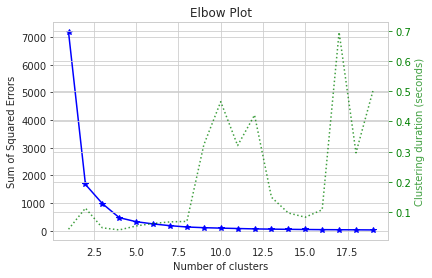

In [22]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

Optimum number of cluster from the elbow method is determined to be 5

#### Applying K-Means Clustering to find stocks which are similar in performance

In [23]:
X_train = pd.DataFrame(X_transformed)
X_train.rename(columns = {0:"Open", 1:"Close"})

,Open,Close
0,4.675858,-0.087873
1,4.673598,0.032498
2,4.503830,0.053683
3,4.690699,-0.061803
4,4.742396,0.035006
...,...,...
1431,-3.619673,-0.051333
1432,-3.591027,-0.005564
1433,-3.675622,0.001557
1434,-3.294939,-0.190268


#### Kmean Algorithm

In [24]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_train)
y_kmeans = k_means.fit_predict(X_train)
labels = k_means.labels_

In [25]:
len(labels), X_train.shape

(1436, (1436, 2))

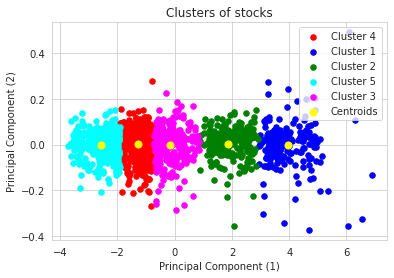

In [28]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 5')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 3')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

The above 5 clusters shows the stocks which are similar in stock performance

In [29]:
import pickle

filename = 'final_model_Kmean_clustring.pkl'
pickle.dump(k_means, open(filename, 'wb'))